In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [294]:
plt.style.use("fivethirtyeight")

# EDA part

In [295]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [296]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [297]:
df.info() # total charges is object there are strings inside of it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [298]:
#handle numeric column which seems object
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],"coerce") # coere returns Nan value for string values

In [299]:
df.isnull().sum() #there are 11 NaN value

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [300]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [301]:
df.drop(columns=["customerID"],inplace=True)

# Visualizing

In [302]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean()) #replace  mean value to Nan values

# Functions to get categoric and numeric columns

In [303]:
def numeric_col(): # takes numerical columns
    num_col=df.select_dtypes(include=["float64","int64","int32"])
    return num_col
def categ_col():
    categ_col=df.select_dtypes(include=["object"])
    return categ_col

In [304]:
categorical_col=categ_col()


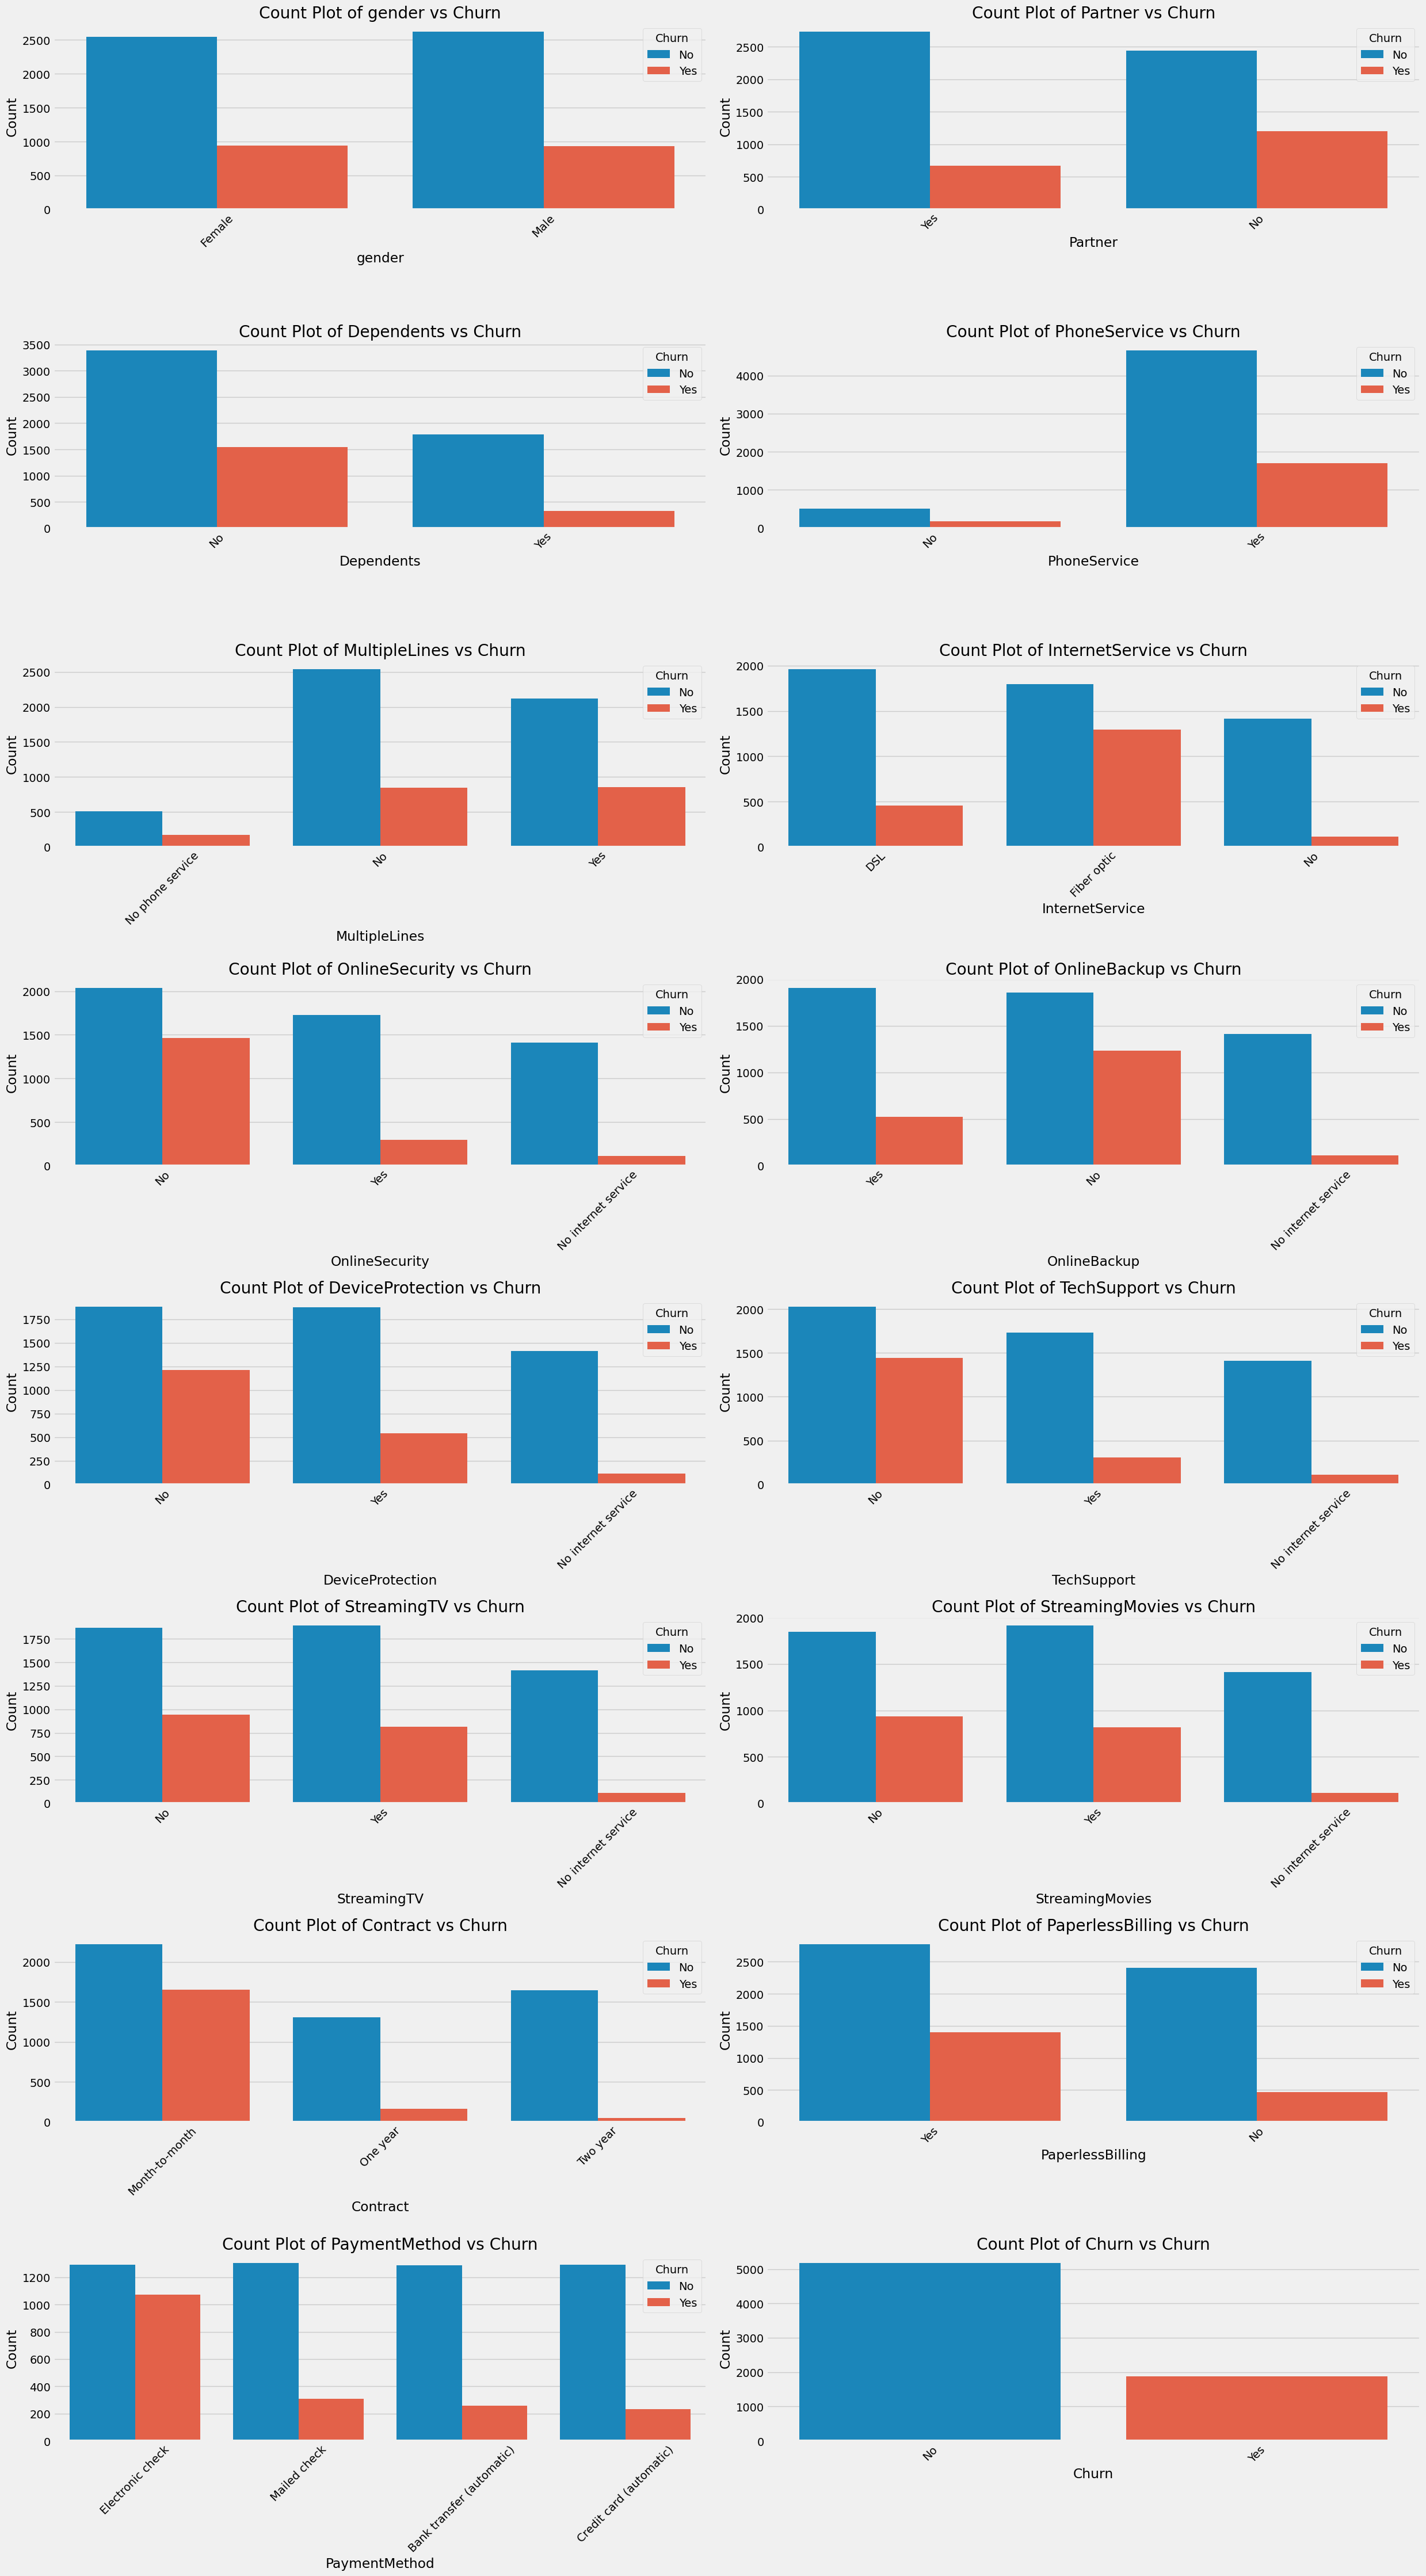

In [305]:
num_plots = len(categorical_col)
fig, axs = plt.subplots(8,2,figsize=(25, 45))  # 6 rows, 2 columns, adjust figsize as needed

# Flatten the 2D array of axs to make it easier to iterate
axs = axs.flatten()
for i, col in enumerate(categorical_col):
    sns.countplot(data=df, x=col, hue='Churn', ax=axs[i])
    axs[i].set_title(f'Count Plot of {col} vs Churn')  # Title for each subplot
    axs[i].set_xlabel(col)  # X-axis label
    axs[i].set_ylabel('Count')  # Y-axis label
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if necessary

plt.tight_layout()

# Show the plots
plt.show()


In [306]:
a=df.groupby("gender")["Churn"].value_counts()
a.index

MultiIndex([('Female',  'No'),
            ('Female', 'Yes'),
            (  'Male',  'No'),
            (  'Male', 'Yes')],
           names=['gender', 'Churn'])

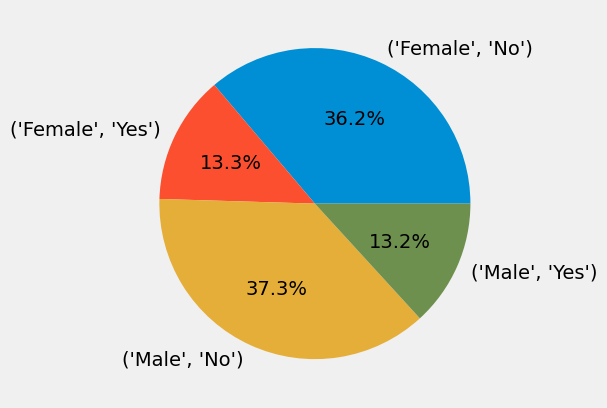

In [307]:
plt.pie(a,labels=a.index,autopct='%1.1f%%') # this shows that number of   churn woman and men equal and they are three times less than not churn customers
plt.show()

<Axes: >

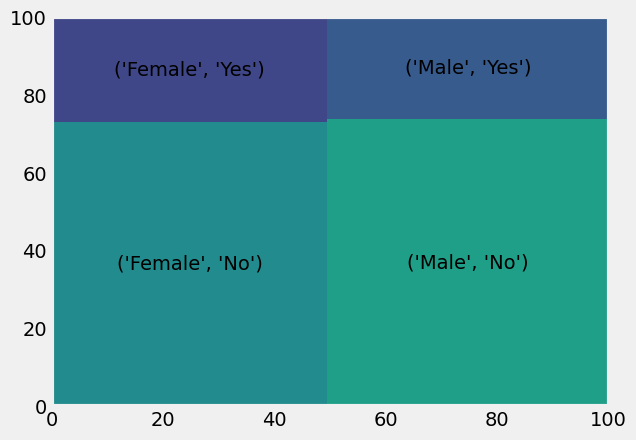

In [308]:
!pip install squarify
import squarify
squarify.plot(sizes=a, label=a.index,)

In [309]:
datta=df.copy() #copy

In [310]:
datta

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [311]:
df["Churn"]=df["Churn"].replace({"No":0,"Yes":1})


In [312]:
numeric_cols=numeric_col()

<Axes: >

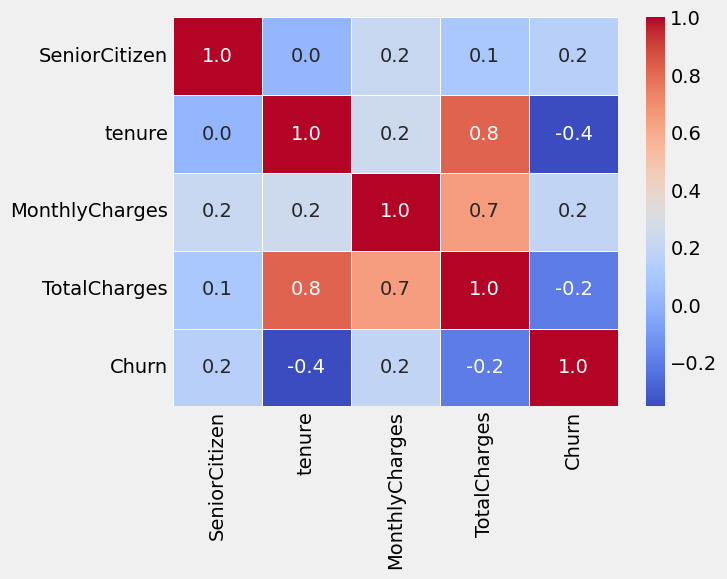

In [313]:
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)

In [389]:
def plot_distribution(df, column_name): #visualize numerical cols
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df,x=column_name,kde = True,hue="Churn")
    plt.title(f"Distribution of {column_name} by Churn")

    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    plt.axvline(col_mean, color = "red", linestyle="--", label="Mean")
    plt.axvline(col_median, color = "blue", linestyle="--", label="Median")
    plt.legend(title="Churn & Stats", labels=["Churn", "Not Churn","Mean","Median"])

    plt.subplot(1, 2, 2)
    sns.boxplot(y  = df[column_name])
    plt.title(f"Boxplot of {column_name}")
    plt.show()

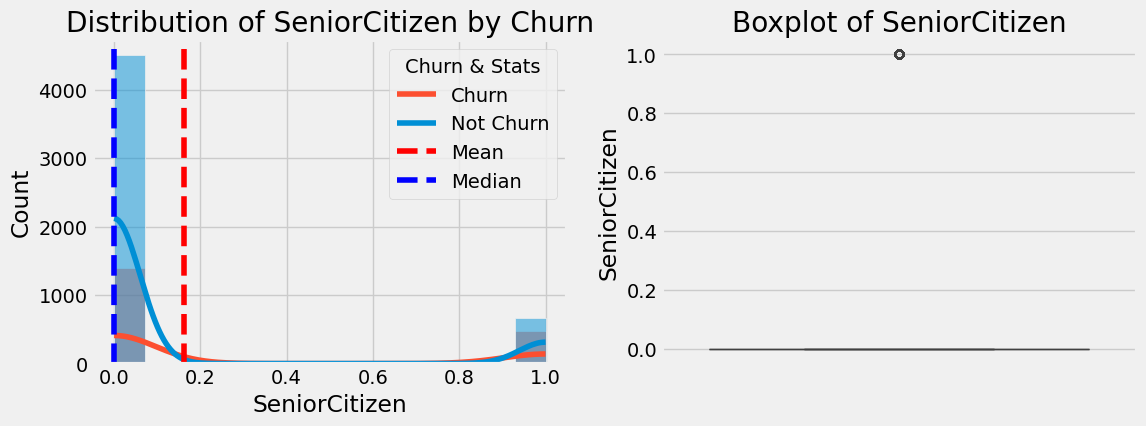

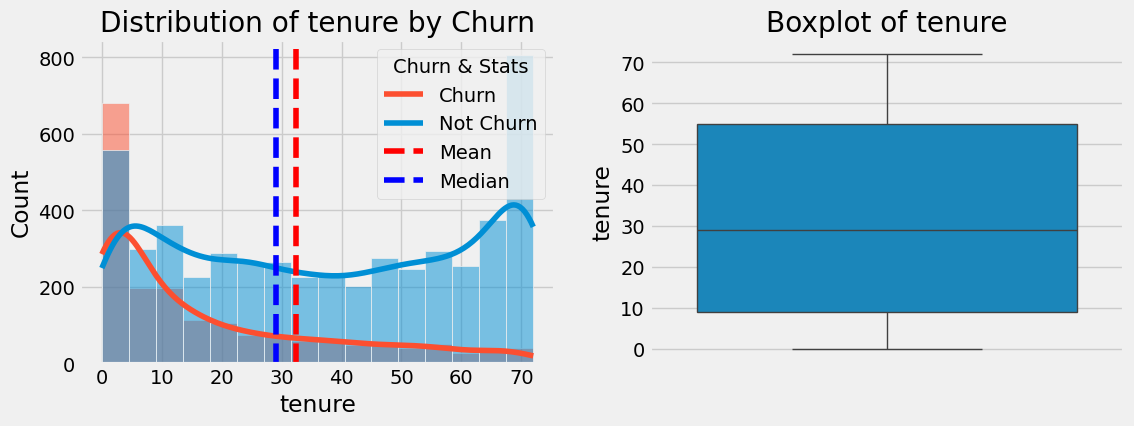

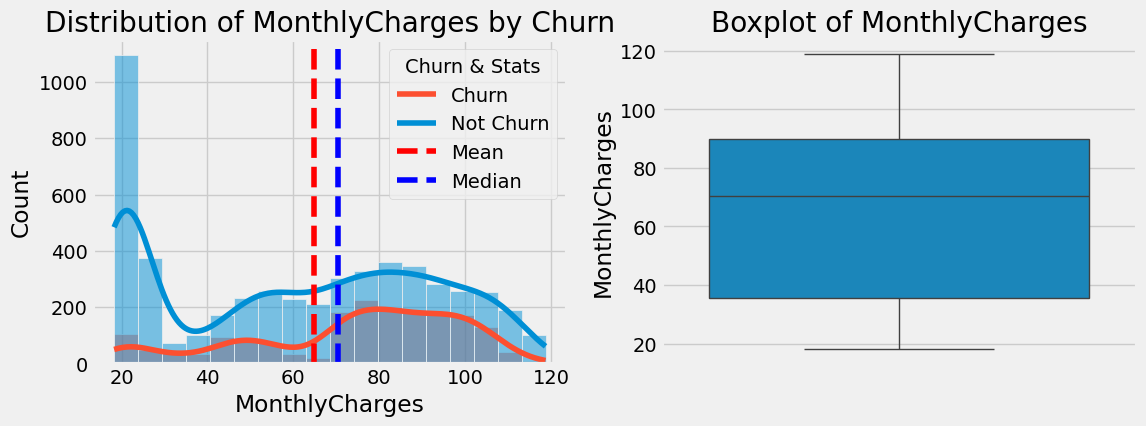

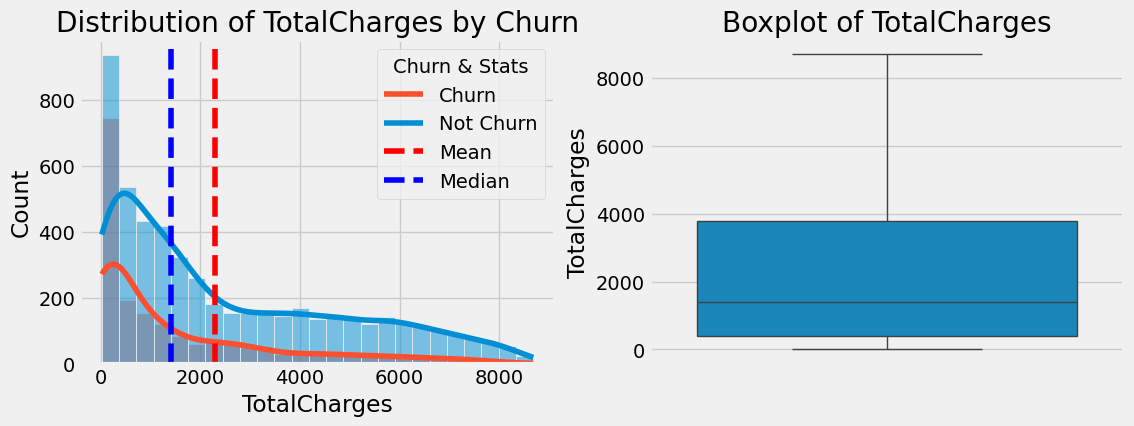

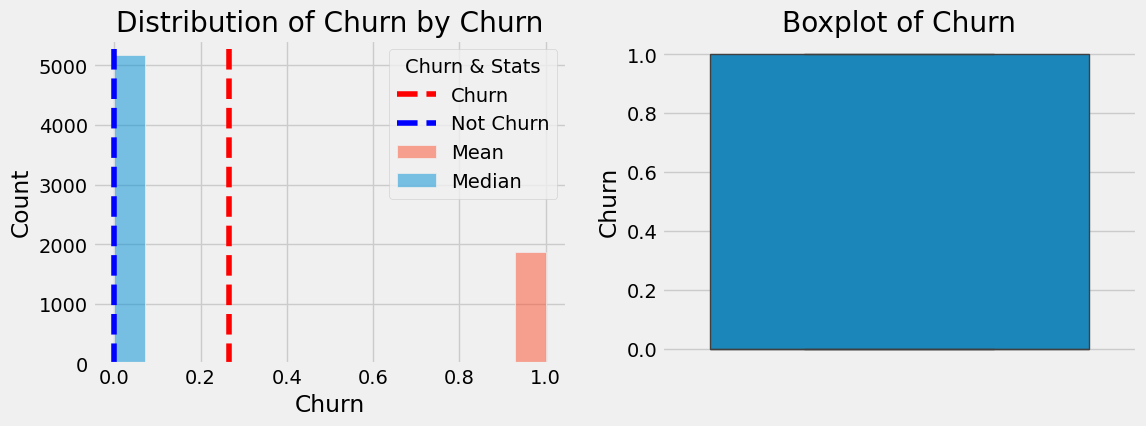

In [390]:
for col in numeric_cols: # outlier control with boxplot
    plot_distribution(df,col)

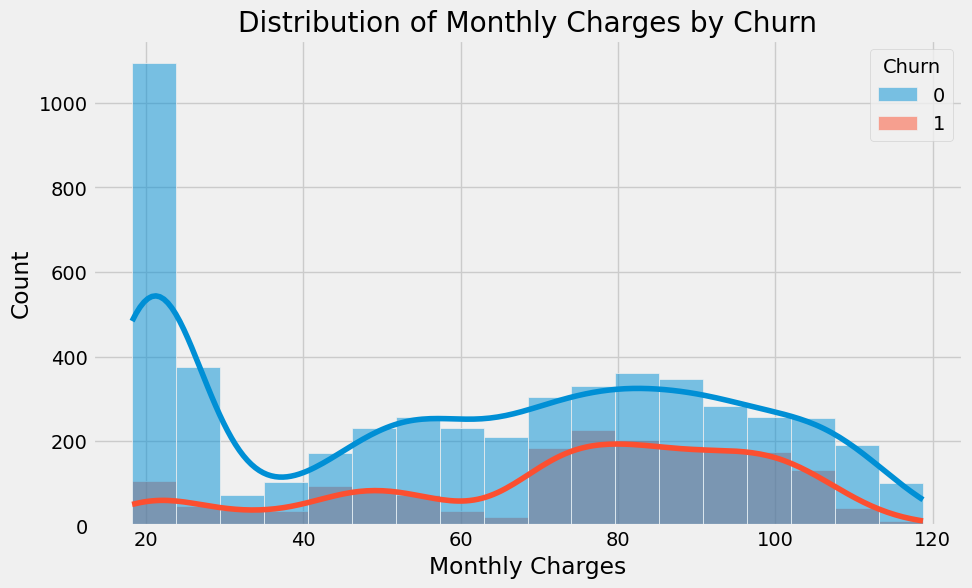

In [359]:
# @title Distribution of Monthly Charges by Churn

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True)
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
_ = plt.ylabel('Count')

In [316]:
from sklearn.preprocessing import LabelEncoder

In [318]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pickle

def create_label_encoders(df):
    """
    Create label encoders for categorical columns

    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe with categorical columns

    Returns:
    --------
    dict
        Dictionary of label encoders for each categorical column
    """
    categorical_cols = df.select_dtypes(include=['object']).columns
    encoders = {}

    for col in categorical_cols:
        print(col)
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le

    return encoders

def save_encoders(encoders, filename='label_encoders.pkl'):
    """
    Save label encoders to a pickle file

    Parameters:
    -----------
    encoders : dict
        Dictionary of label encoders
    filename : str, optional
        Path to save the pickle file
    """
    with open(filename, 'wb') as f:
        pickle.dump(encoders, f)

def load_encoders(filename='label_encoders.pkl'):
    """
    Load label encoders from a pickle file

    Parameters:
    -----------
    filename : str, optional
        Path to load the pickle file

    Returns:
    --------
    dict
        Loaded label encoders
    """
    with open(filename, 'rb') as f:
        return pickle.load(f)

def encode_new_data(new_data, encoders):
    """
    Encode new data using pre-fitted label encoders

    Parameters:
    -----------
    new_data : pandas.DataFrame
        New data to be encoded
    encoders : dict
        Dictionary of pre-fitted label encoders

    Returns:
    --------
    pandas.DataFrame
        Encoded dataframe
    """
    encoded_data = new_data.copy()

    for col, encoder in encoders.items():
        # Handle unseen labels by mapping to the last index
        # This ensures that any previously unseen label gets mapped to the last encoded category
        def safe_transform(x):
            try:
                return encoder.transform([x])[0]
            except ValueError:
                # If label is not in original classes, map to last index
                return len(encoder.classes_) - 1

        encoded_data[col] = encoded_data[col].apply(safe_transform)
    print(encoded_data)
    return encoded_data

# Example usage:
# Assuming 'df' is your original dataframe used for training
encoders = create_label_encoders(df)

save_encoders(encoders)

# For new prediction:
# encoders = load_encoders()
# input_data_encoded = encode_new_data(input_data, encoders)

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod


In [319]:
print(encoders)

{'gender': LabelEncoder(), 'Partner': LabelEncoder(), 'Dependents': LabelEncoder(), 'PhoneService': LabelEncoder(), 'MultipleLines': LabelEncoder(), 'InternetService': LabelEncoder(), 'OnlineSecurity': LabelEncoder(), 'OnlineBackup': LabelEncoder(), 'DeviceProtection': LabelEncoder(), 'TechSupport': LabelEncoder(), 'StreamingTV': LabelEncoder(), 'StreamingMovies': LabelEncoder(), 'Contract': LabelEncoder(), 'PaperlessBilling': LabelEncoder(), 'PaymentMethod': LabelEncoder()}


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


# Preprocessing

In [321]:
from sklearn.preprocessing import StandardScaler  # should be applied after split data as train and test

# OHE


# Turning boolean to 0 or 1

In [322]:
dataframe=df

# standardization and sampling

In [323]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier,plot_importance

In [324]:
numerical_cols=["MonthlyCharges","TotalCharges",'tenure']

In [325]:
X = dataframe.drop(columns='Churn')  # Features (independent variables)
y = dataframe['Churn']  # Target (dependent variable)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [326]:

ss=StandardScaler()
X_train[numerical_cols]=ss.fit_transform(X_train[numerical_cols])
X_test[numerical_cols]=ss.transform(X_test[numerical_cols])


In [327]:
a=df["Churn"].value_counts() #percentage of churn
rate=a[0]/a[1]
rate

2.7683253076511503

In [328]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,-0.465683,1,0,0,2,0,2,0,0,2,1,0,3,-0.000474,-0.422099
1623,0,0,0,0,0.885537,1,2,1,0,2,0,0,2,2,2,1,0,1.074754,1.255366
6074,1,0,1,0,-1.284605,0,1,0,0,0,0,0,0,0,0,1,2,-1.376499,-1.002985
1362,1,0,0,0,-1.161766,1,0,1,0,0,0,0,0,0,0,1,2,0.177346,-0.908113
6754,1,0,0,1,-1.325551,1,2,0,2,2,0,2,0,0,2,1,0,-0.098524,-0.003468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,-1.284605,1,0,1,2,0,0,0,2,2,0,1,2,1.001632,-0.971339
5191,0,0,1,1,-0.383791,1,2,0,2,2,2,2,2,2,2,1,1,0.872006,-0.041063
5226,1,0,1,1,-0.834198,1,0,2,1,1,1,1,1,1,0,1,2,-1.452945,-0.877993
5390,1,1,0,0,-0.834198,1,2,1,0,0,2,0,2,2,0,1,2,1.149538,-0.482538


In [329]:
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

#  oversampling the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],

}

#cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)


grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters
best_params = grid_search.best_params_
print("Best hyperparameters found by GridSearchCV:", best_params)

# Train the model with the best hyperparameters
best_rf = grid_search.best_estimator_
print(best_rf)
# Make predictions
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]


print("Classification Report:")
print(classification_report(y_test, y_pred))

print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best hyperparameters found by GridSearchCV: {'max_depth': None, 'n_estimators': 100}
RandomForestClassifier(class_weight='balanced', random_state=42)
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1036
           1       0.56      0.65      0.60       373

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409

F1-Score: 0.6044776119402985
ROC-AUC Score: 0.8288309853323258


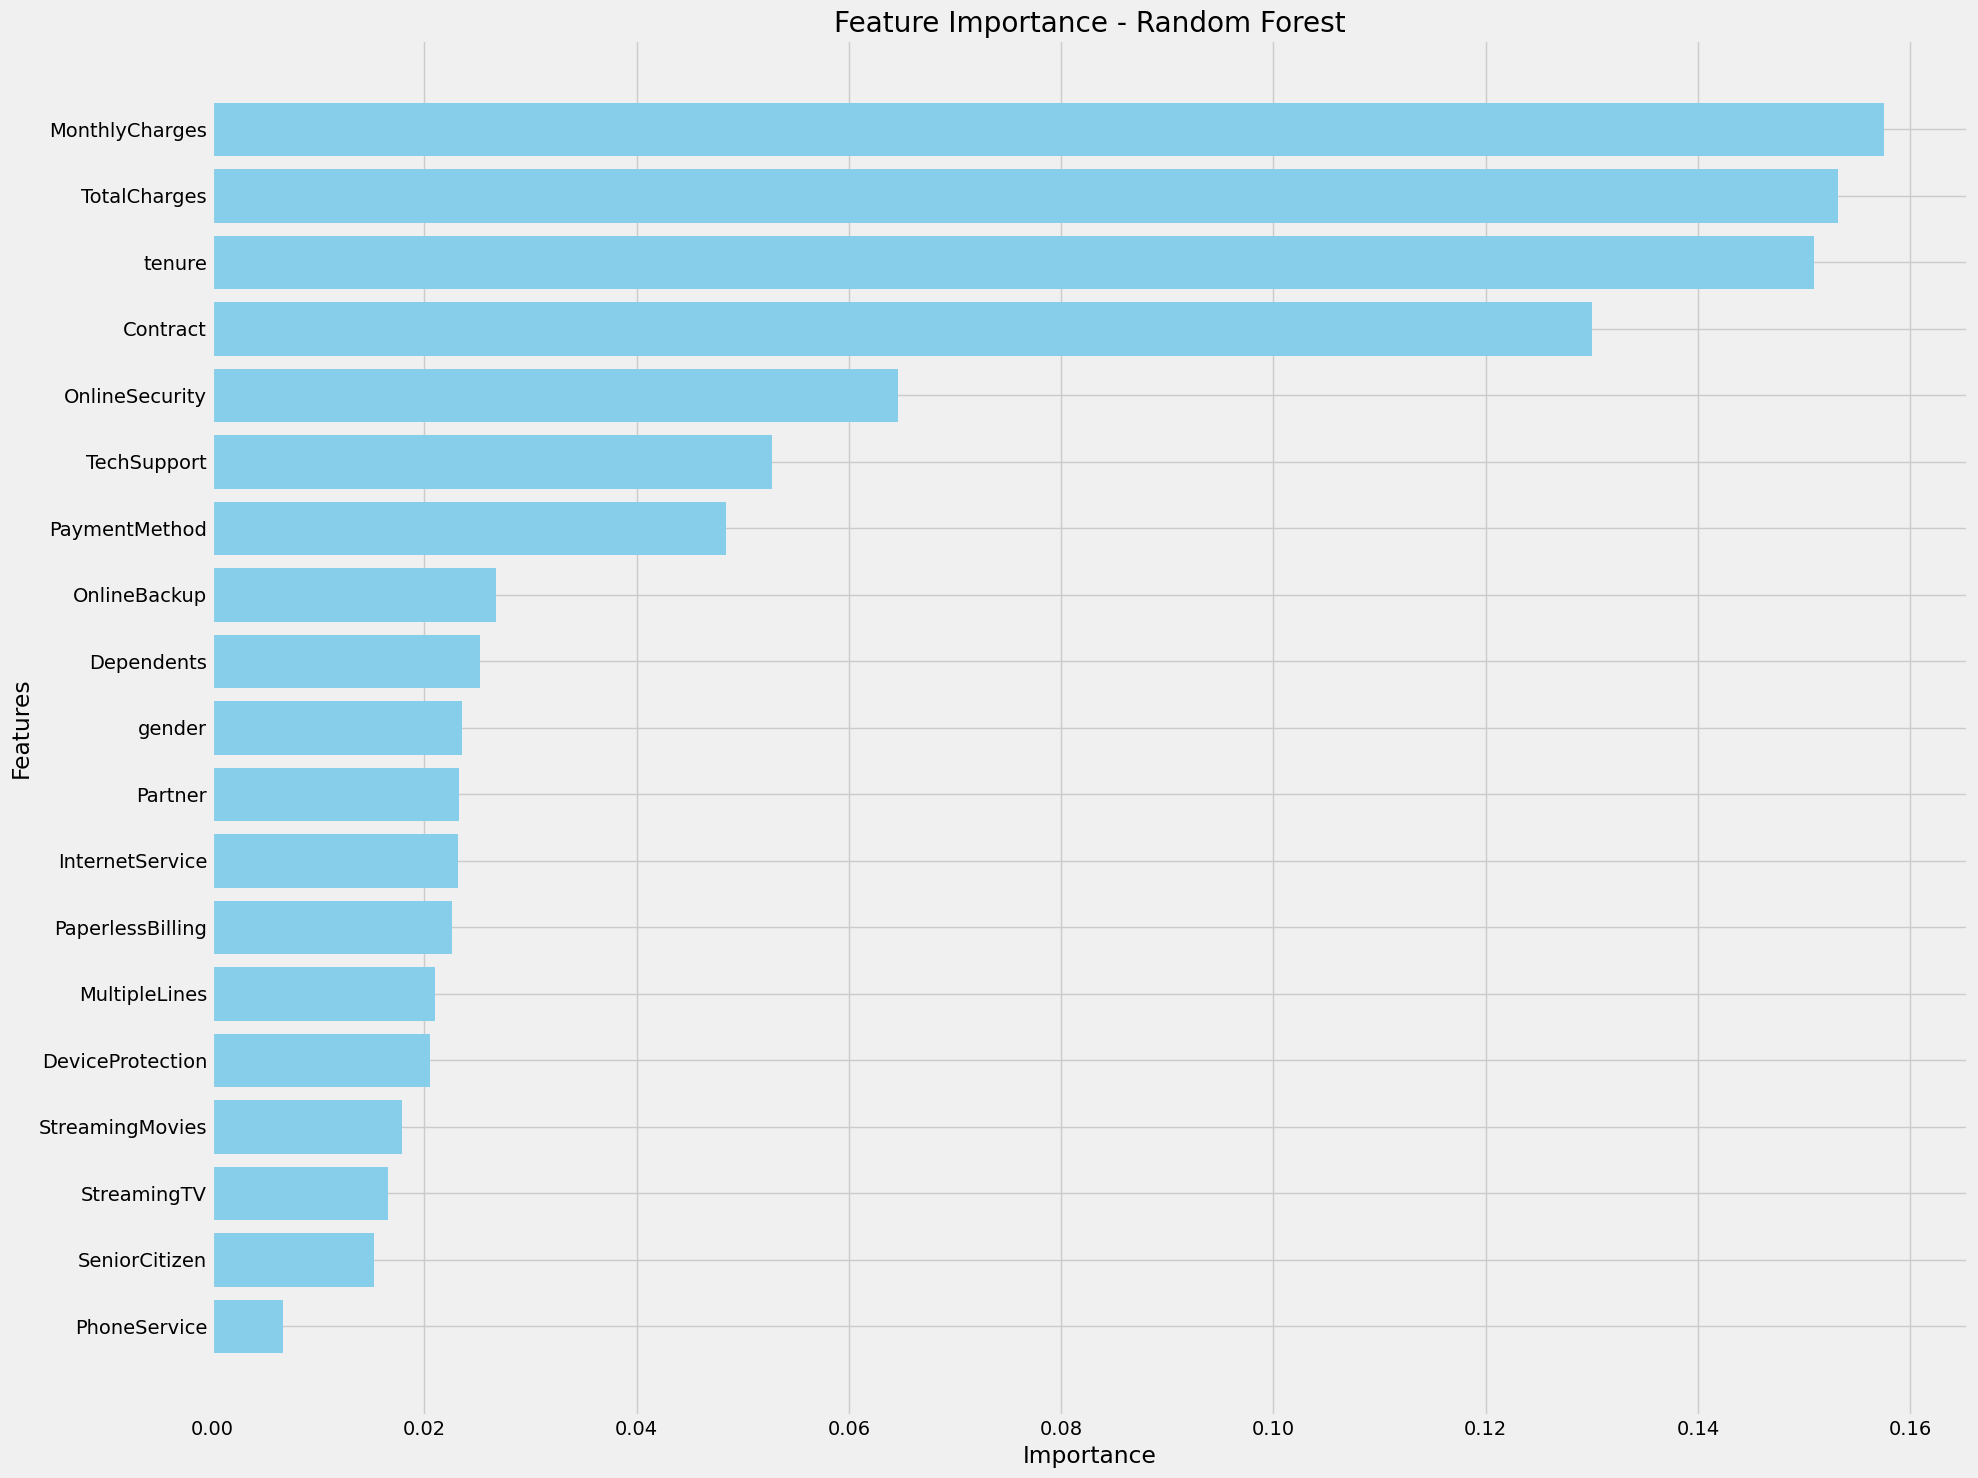

In [330]:
feature_names = X.columns

importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort features by importance
#sorted for better readability
sorted_features = np.array(feature_names)[indices]
sorted_importances = importances[indices],
sorted_importances
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Extract sorted features and importances
sorted_features = importance_df['Feature'].values
sorted_importances = importance_df['Importance'].values

# Plotting
plt.figure(figsize=(20, 15))
plt.title("Feature Importance - Random Forest")

# Horizontal bar plot
plt.barh(range(len(sorted_importances)), sorted_importances, align="center", color='skyblue')
plt.yticks(range(len(sorted_importances)), sorted_features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature on top
plt.tight_layout()
plt.savefig("feature_importance_rf5.png", dpi=300, bbox_inches="tight")
plt.show()

In [331]:
dataframe

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [332]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train, y_train= smote.fit_resample(X_train, y_train)
rf = RandomForestClassifier(bootstrap=False,class_weight='balanced', random_state=42,max_depth=10,n_estimators=200)
baseline=rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1036
           1       0.55      0.76      0.64       373

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409

F1-Score: 0.6382978723404256
ROC-AUC Score: 0.8519581914354033


<Axes: >

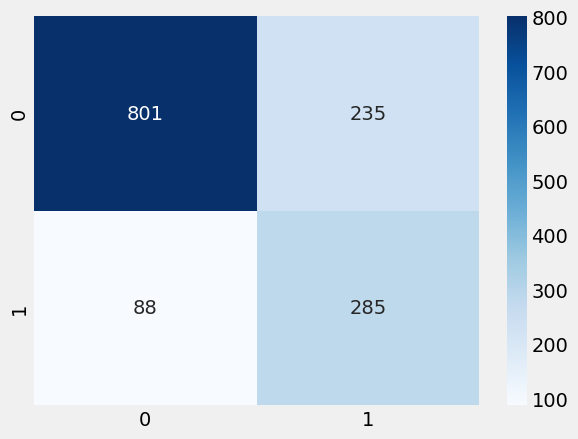

In [333]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")

In [334]:
xgb = XGBClassifier(scale_pos_weight=rate, random_state=42) # with smote success= -4 major class +2 minor class
# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)
print(f"Xgboost finding best params......")


grid_search.fit(X_train_smote, y_train_smote)



best_params = grid_search.best_params_
print("Best hyperparameters found by GridSearchCV:", best_params)



best_xgb = grid_search.best_estimator_



y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]


print("Classification Report:")
print(classification_report(y_test, y_pred))

print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Xgboost finding best params......
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found by GridSearchCV: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1036
           1       0.52      0.73      0.61       373

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409

F1-Score: 0.605586592178771
ROC-AUC Score: 0.819818957218421


<Figure size 1000x800 with 0 Axes>

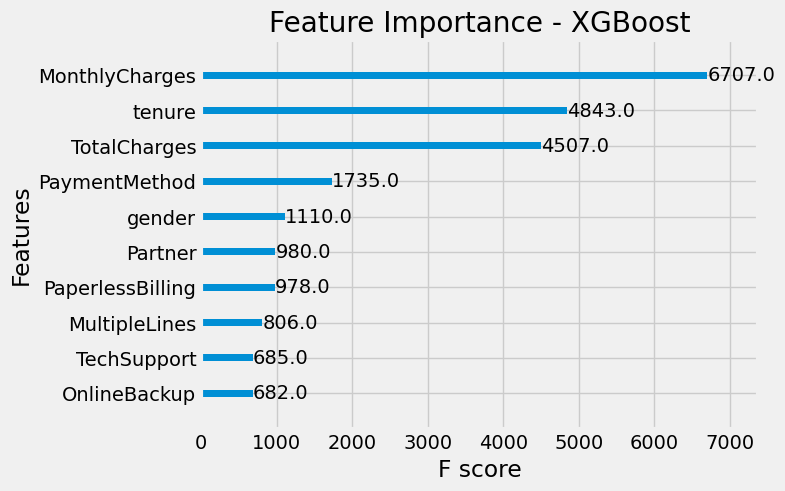

In [335]:
import xgboost as xgb
plt.figure(figsize=(10, 8))
plot_importance(best_xgb, importance_type='weight', max_num_features=10)  # Top 10 features
plt.title("Feature Importance - XGBoost")
plt.show()

<Axes: >

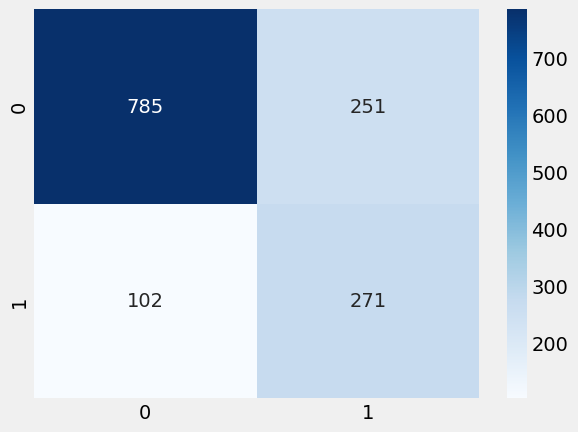

In [336]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")

In [337]:
y_train_smote.value_counts()

,count
Churn,
0,4138
1,4138


In [338]:
#neural network

In [339]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [340]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,-0.465683,1,0,0,2,0,2,0,0,2,1,0,3,-0.000474,-0.422099
1,0,0,0,0,0.885537,1,2,1,0,2,0,0,2,2,2,1,0,1.074754,1.255366
2,1,0,1,0,-1.284605,0,1,0,0,0,0,0,0,0,0,1,2,-1.376499,-1.002985
3,1,0,0,0,-1.161766,1,0,1,0,0,0,0,0,0,0,1,2,0.177346,-0.908113
4,1,0,0,1,-1.325551,1,2,0,2,2,0,2,0,0,2,1,0,-0.098524,-0.003468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271,0,0,0,0,-1.044006,1,2,1,0,0,0,0,2,0,0,1,1,0.688828,-0.728659
8272,0,0,0,0,0.036504,1,2,1,2,2,0,1,2,2,0,1,0,1.426934,0.574780
8273,1,0,0,0,0.039749,1,2,1,0,2,2,0,2,2,0,1,2,1.357794,0.509750
8274,1,0,0,0,0.445843,1,0,2,1,1,1,1,1,1,0,1,2,-1.479268,-0.617416


Epoch 1/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6875 - loss: 0.6323 - val_accuracy: 0.5537 - val_loss: 0.7418
Epoch 2/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7727 - loss: 0.4743 - val_accuracy: 0.6926 - val_loss: 0.6150
Epoch 3/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7660 - loss: 0.4699 - val_accuracy: 0.7572 - val_loss: 0.4989
Epoch 4/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7822 - loss: 0.4480 - val_accuracy: 0.7856 - val_loss: 0.4844
Epoch 5/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7773 - loss: 0.4457 - val_accuracy: 0.7663 - val_loss: 0.5308
Epoch 6/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7968 - loss: 0.4314 - val_accuracy: 0.7880 - val_loss: 0.4988
Epoch 7/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7859 - loss: 0.4441 - val_accuracy: 0.7615 - val_loss: 0.5368
Epoch 8/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7898 - loss: 0.4247 - val_accuracy: 0.

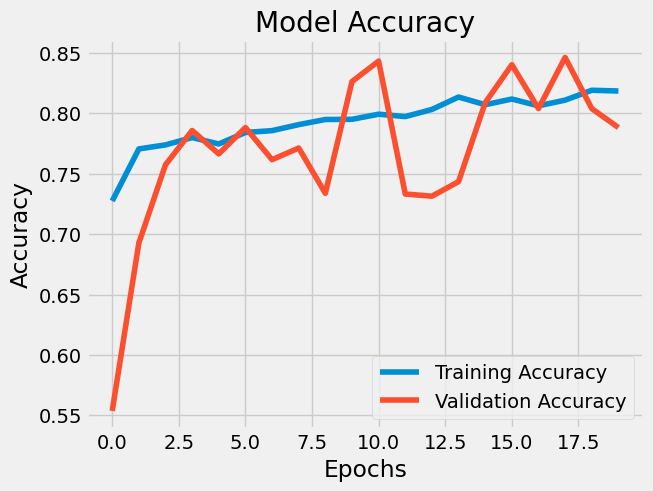

In [341]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),# Input layer
    Dropout(0,3),
    Dense(32, activation='relu'),
    BatchNormalization(),# Hidden layer
    Dropout(0,4),
    Dense(1, activation='sigmoid')                            # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True)
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32,callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy= model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predict churn probabilities


In [342]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, model.predict(X_test))
print(f"AUC-ROC Score: {roc_auc:.2f}")

# Accuracy Score
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score:.2f}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Confusion Matrix:
 [[812 224]
 [103 270]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1036
           1       0.55      0.72      0.62       373

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.77      0.78      1409

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
AUC-ROC Score: 0.84
Accuracy Score: 0.77


In [343]:
y_pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

<Axes: >

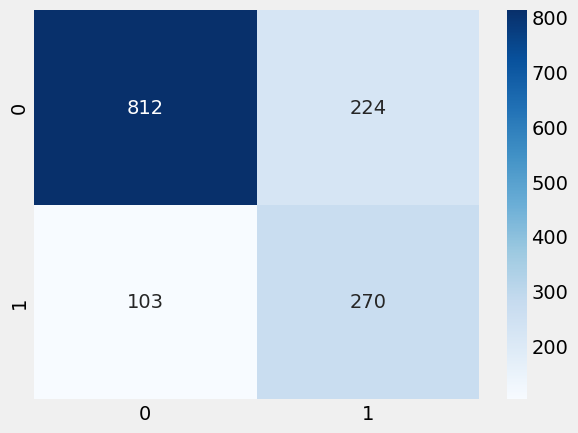

In [344]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")

In [345]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [347]:
encoderss = load_encoders()
encoderss

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [348]:
def predict_churn(gender, senior_citizen, partner, dependents, tenure, phone_service, multiple_lines,
                  internet_service, online_security, online_backup, device_protection, tech_support,
                  streaming_tv, streaming_movies, contract, paperless_billing, payment_method,
                  monthly_charges, total_charges):

  input_data = {
        'gender': gender,
        'SeniorCitizen': senior_citizen,
        'Partner': partner,
        'Dependents': dependents,
        'tenure': tenure,
        'PhoneService': phone_service,
        'MultipleLines': multiple_lines,
        'InternetService': internet_service,
        'OnlineSecurity': online_security,
        'OnlineBackup': online_backup,
        'DeviceProtection': device_protection,
        'TechSupport': tech_support,
        'StreamingTV': streaming_tv,
        'StreamingMovies': streaming_movies,
        'Contract': contract,
        'PaperlessBilling': paperless_billing,
        'PaymentMethod': payment_method,
        'MonthlyCharges': monthly_charges,
        'TotalCharges': total_charges
    }
  input_data=pd.DataFrame([input_data])

  encoders = load_encoders()
  input_data = encode_new_data(input_data, encoders)  # Apply encoding to all relevant columns
  # Pass the entire preprocessed input_data DataFrame to ss.transform
  input_data[numerical_cols] = ss.transform(input_data[numerical_cols])
  print(input_data)
  prediction =(model.predict(input_data) > 0.5).astype(int)
  #prediction = best_rf.predict(input_data)
  print(prediction[0])
  return "Churn" if prediction[0]==1 else "Not Churn"






In [349]:
input_data = predict_churn(
    gender='Female',               # Gender
    senior_citizen=0,              # SeniorCitizen (0 or 1)
    partner='No',                  # Partner
    dependents='No',               # Dependents
    tenure=300,                     # Tenure (between 0-72)
    phone_service='Yes',           # PhoneService
    multiple_lines='No',           # MultipleLines
    internet_service='Fiber optic',# InternetService
    online_security='No',          # OnlineSecurity
    online_backup='Yes',           # OnlineBackup
    device_protection='No',        # DeviceProtection
    tech_support='No',             # TechSupport
    streaming_tv='Yes',            # StreamingTV
    streaming_movies='No',         # StreamingMovies
    contract='One  Year',     # Contract
    paperless_billing="No",           # PaperlessBilling
    payment_method='Electronic check', # PaymentMethod
    monthly_charges=40.5,          # MonthlyCharges
    total_charges=5500.5           # TotalCharges
)

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        0           0     300             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                1               0             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            2                0         2   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 0              2            40.5        5500.5  
   gender  SeniorCitizen  Partner  Dependents     tenure  PhoneService  \
0       0              0        0           0  10.958269             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                1               0             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            2                0         2   

In [350]:
input_data

'Churn'

In [351]:
type(input_data)

str

In [352]:

"""for col, encoder in encoders.items():
    print(f"Encoding column: {col}{encoder}")
    input_data[col] = encoder.transform(input_data[col])"""

'for col, encoder in encoders.items():\n    print(f"Encoding column: {col}{encoder}")\n    input_data[col] = encoder.transform(input_data[col])'

In [353]:
!pip install gradio

In [354]:
df[df["Churn"]==1]  #  who is churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
13,1,0,0,0,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1,0,0,0,12,1,0,0,0,0,0,2,2,0,1,1,2,59.80,727.80,1
7026,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,403.35,1
7032,1,1,0,0,1,1,2,1,0,0,0,0,0,0,0,1,2,75.75,75.75,1
7034,0,0,0,0,67,1,2,1,2,2,2,0,2,0,0,1,1,102.95,6886.25,1


In [355]:
import gradio as gr


# Create input components
input_components = [
    gr.Dropdown(choices=['Male', 'Female'], label='Gender'),
    gr.Dropdown(choices=[0, 1], label='SeniorCitizen'),
    gr.Dropdown(choices=['Yes', 'No'], label='Partner'),
    gr.Dropdown(choices=['Yes', 'No'], label='Dependents'),
    gr.Slider(minimum=0, maximum=72, value=10, label='Tenure'),
    gr.Dropdown(choices=['Yes', 'No'], label='PhoneService'),
    gr.Dropdown(choices=['Yes', 'No'], label='MultipleLines'),
    gr.Dropdown(choices=['DSL', 'Fiber optic', 'No'], label='InternetService'),
    gr.Dropdown(choices=['Yes', 'No'], label='OnlineSecurity'),
    gr.Dropdown(choices=['Yes', 'No'], label='OnlineBackup'),
    gr.Dropdown(choices=['Yes', 'No', 'No internet service'], label='DeviceProtection'),
    gr.Dropdown(choices=['Yes', 'No', 'No internet service'], label='TechSupport'),
    gr.Dropdown(choices=['Yes', 'No', 'No internet service'], label='StreamingTV'),
    gr.Dropdown(choices=['Yes', 'No', 'No internet service'], label='StreamingMovies'),
    gr.Dropdown(choices=['Month-to-month', 'One year', 'Two year'], label='Contract'),
    gr.Dropdown(choices=["Yes", "No"], label='PaperlessBilling'),
    gr.Dropdown(choices=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], label='PaymentMethod'),
    gr.Slider(minimum=20, maximum=200, value=60, label='MonthlyCharges'),
    gr.Slider(minimum=10, maximum=8000, value=2000, label='TotalCharges')
]

# Create the Gradio interface
demo =gr.Interface(
    fn=predict_churn,
    inputs=input_components,
    outputs=gr.Textbox(label="Churn Prediction"),
    title="Customer Churn Prediction",
    description="Enter customer details to predict whether they will churn.",
    live=True,

)

demo.launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://5a927aadf965ab7523.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           1      72             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              2                0               2             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 2            2            2                2         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2              60          2000  
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       1              0        1           1  1.622566             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              2                0               2             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 2            2            2                2         0   

